<h1 align="center">Images</h1>

注：该教程简化自[SimpleITK 官方 Notebooks](http://insightsoftwareconsortium.github.io/SimpleITK-Notebooks/)。

<table width="100%">
<tr style="background-color: red;"><td><font color="white">SimpleITK conventions:</font></td></tr>
<tr><td>
<ul>
<li>Image access is in x,y,z order, image.GetPixel(x,y,z) or image[x,y,z], with zero based indexing.</li>
<li>If the output of an ITK filter has non-zero starting index, then the index will be set to 0, and the origin adjusted accordingly.</li>
</ul>
</td></tr>
</table>

The unique feature of SimpleITK (derived from ITK) as a toolkit for image manipulation and analysis is that it views <b>images as physical objects occupying a bounded region in physical space</b>. In addition images can have different spacing between pixels along each axis, and the axes are not necessarily orthogonal. The following figure illustrates these concepts. 

<img src="ImageOriginAndSpacing.png" style="width:700px"/><br><br>


### Pixel Types

The pixel type is represented as an enumerated type. The following is a table of the enumerated list.

<table>
  <tr><td>sitkUInt8</td><td>Unsigned 8 bit integer</td></tr>
  <tr><td>sitkInt8</td><td>Signed 8 bit integer</td></tr>
  <tr><td>sitkUInt16</td><td>Unsigned 16 bit integer</td></tr>
  <tr><td>sitkInt16</td><td>Signed 16 bit integer</td></tr>
  <tr><td>sitkUInt32</td><td>Unsigned 32 bit integer</td></tr>
  <tr><td>sitkInt32</td><td>Signed 32 bit integer</td></tr>
  <tr><td>sitkUInt64</td><td>Unsigned 64 bit integer</td></tr>
  <tr><td>sitkInt64</td><td>Signed 64 bit integer</td></tr>
  <tr><td>sitkFloat32</td><td>32 bit float</td></tr>
  <tr><td>sitkFloat64</td><td>64 bit float</td></tr>
  <tr><td>sitkComplexFloat32</td><td>complex number of 32 bit float</td></tr>
  <tr><td>sitkComplexFloat64</td><td>complex number of 64 bit float</td></tr>
  <tr><td>sitkVectorUInt8</td><td>Multi-component of unsigned 8 bit integer</td></tr>
  <tr><td>sitkVectorInt8</td><td>Multi-component of signed 8 bit integer</td></tr>
  <tr><td>sitkVectorUInt16</td><td>Multi-component of unsigned 16 bit integer</td></tr>
  <tr><td>sitkVectorInt16</td><td>Multi-component of signed 16 bit integer</td></tr>
  <tr><td>sitkVectorUInt32</td><td>Multi-component of unsigned 32 bit integer</td></tr>
  <tr><td>sitkVectorInt32</td><td>Multi-component of signed 32 bit integer</td></tr>
  <tr><td>sitkVectorUInt64</td><td>Multi-component of unsigned 64 bit integer</td></tr>
  <tr><td>sitkVectorInt64</td><td>Multi-component of signed 64 bit integer</td></tr>
  <tr><td>sitkVectorFloat32</td><td>Multi-component of 32 bit float</td></tr>
  <tr><td>sitkVectorFloat64</td><td>Multi-component of 64 bit float</td></tr>
  <tr><td>sitkLabelUInt8</td><td>RLE label of unsigned 8 bit integers</td></tr>
  <tr><td>sitkLabelUInt16</td><td>RLE label of unsigned 16 bit integers</td></tr>
  <tr><td>sitkLabelUInt32</td><td>RLE label of unsigned 32 bit integers</td></tr>
  <tr><td>sitkLabelUInt64</td><td>RLE label of unsigned 64 bit integers</td></tr>
</table>

There is also `sitkUnknown`, which is used for undefined or erroneous pixel ID's. It has a value of -1.

The 64-bit integer types are not available on all distributions. When not available the value is `sitkUnknown`.

In [1]:
import SimpleITK as sitk

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from ipywidgets import interact, fixed
import os

OUTPUT_DIR = './Output'

## Load your first image and display it

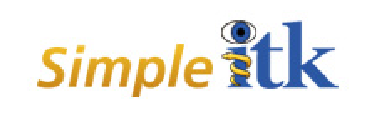

In [2]:
logo = sitk.ReadImage('./Data/SimpleITK.jpg')

plt.imshow(sitk.GetArrayViewFromImage(logo))
plt.axis('off');

## Image Construction

There are a variety of ways to create an image. 

The following components are required for a complete definition of an image:
<ol>
<li>Pixel type [fixed on creation, no default]: unsigned 32 bit integer, sitkVectorUInt8, etc., see list above.</li>
<li> Sizes [fixed on creation, no default]: number of pixels/voxels in each dimension. This quantity implicitly defines the image dimension.</li>
<li> Origin [default is zero]: coordinates of the pixel/voxel with index (0,0,0) in physical units (i.e. mm).</li>
<li> Spacing [default is one]: Distance between adjacent pixels/voxels in each dimension given in physical units.</li>
<li> Direction matrix [default is identity]: mapping, rotation, between direction of the pixel/voxel axes and physical directions.</li>
</ol>

Initial pixel/voxel values are set to zero.

In [3]:
image_3D = sitk.Image(256, 128, 64, sitk.sitkInt16)
image_2D = sitk.Image(64, 64, sitk.sitkFloat32)
image_2D = sitk.Image([32,32], sitk.sitkUInt32)
image_RGB = sitk.Image([128,64], sitk.sitkVectorUInt8, 3)

## Basic Image Attributes

You can change the image origin, spacing and direction. Making such changes to an image already containing data should be done cautiously. 

In [4]:
image_3D.SetOrigin((78.0, 76.0, 77.0))
image_3D.SetSpacing([0.5,0.5,3.0])

print(image_3D.GetOrigin())
print(image_3D.GetSize())
print(image_3D.GetSpacing())
print(image_3D.GetDirection())

(78.0, 76.0, 77.0)
(256, 128, 64)
(0.5, 0.5, 3.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


Image dimension queries:

In [5]:
print(image_3D.GetDimension())
print(image_3D.GetWidth())
print(image_3D.GetHeight())
print(image_3D.GetDepth())

3
256
128
64


What is the depth of a 2D image?

In [6]:
print(image_2D.GetSize())
print(image_2D.GetDepth())

(32, 32)
0


Pixel/voxel type queries: 

In [8]:
print(image_3D.GetPixelIDValue())
print(image_3D.GetPixelIDTypeAsString())
print(image_RGB.GetNumberOfComponentsPerPixel())

2
16-bit signed integer
3


What is the dimension and size of a Vector image and its data?

In [ ]:
print(image_RGB.GetDimension())
print(image_RGB.GetSize())
print(image_RGB.GetNumberOfComponentsPerPixel())

## Accessing Pixels and Slicing

The Image class's member functions ``GetPixel`` and ``SetPixel`` provide an ITK-like interface for pixel access.

In [9]:
print image_2D

Image (0000000004387E80)
  RTTI typeinfo:   class itk::Image<unsigned int,2>
  Reference Count: 1
  Modified Time: 958
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 0
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [32, 32]
  BufferedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [32, 32]
  RequestedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [32, 32]
  Spacing: [1, 1]
  Origin: [0, 0]
  Direction: 
1 0
0 1

  IndexToPointMatrix: 
1 0
0 1

  PointToIndexMatrix: 
1 0
0 1

  Inverse Direction: 
1 0
0 1

  PixelContainer: 
    ImportImageContainer (0000000003D7EBD0)
      RTTI typeinfo:   class itk::ImportImageContainer<unsigned __int64,unsigned int>
      Reference Count: 1
      Modified Time: 959
      Debug: Off
      Object Name: 
      Observers: 
        none
  

In [10]:
print(image_3D.GetPixel(0, 0, 0))
image_3D.SetPixel(0, 0, 0, 1)
print(image_3D.GetPixel(0, 0, 0))

# This can also be done using Pythonic notation.
print(image_3D[0,0,1])
image_3D[0,0,1] = 2
print(image_3D[0,0,1])

0
1
0
2


Slicing of SimpleITK images returns a copy of the image data. 

This is similar to slicing Python lists and differs from the "view" returned by slicing numpy arrays. 

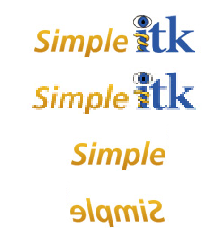

In [11]:
# Brute force sub-sampling 
logo_subsampled = logo[::2,::2]

# Get the sub-image containing the word Simple
simple = logo[0:115,:]

# Get the sub-image containing the word Simple and flip it
simple_flipped = logo[115:0:-1,:]

n = 4

plt.subplot(n,1,1)
plt.imshow(sitk.GetArrayViewFromImage(logo))
plt.axis('off');

plt.subplot(n,1,2)
plt.imshow(sitk.GetArrayViewFromImage(logo_subsampled))
plt.axis('off');

plt.subplot(n,1,3)
plt.imshow(sitk.GetArrayViewFromImage(simple))
plt.axis('off')

plt.subplot(n,1,4)
plt.imshow(sitk.GetArrayViewFromImage(simple_flipped))
plt.axis('off');

Draw a square on top of the logo image:
After running this cell, uncomment "Version 3" and see its effect.

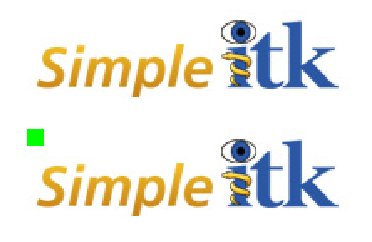

In [12]:
# Version 0: get the numpy array and assign the value via broadcast - later on you will need to construct 
# a new image from the array 
logo_pixels = sitk.GetArrayFromImage(logo)
logo_pixels[0:10,0:10] = [0,255,0]

# image slicing returns a new image, so all assignments here will not have any effect on the original
# 'logo' image
logo_subimage = logo[0:10, 0:10]
for x in range(0,10):
    for y in range(0,10):
        logo_subimage[x,y] = [255,0,0]
        
plt.subplot(2,1,1)
plt.imshow(sitk.GetArrayViewFromImage(logo))
plt.axis('off')

plt.subplot(2,1,2)
plt.imshow(logo_pixels)
plt.axis('off');

## Conversion between numpy and SimpleITK

SimpleITK and numpy indexing access is in opposite order! 

SimpleITK: image[x,y,z]<br>
numpy: image_numpy_array[z,y,x]

### From SimpleITK to numpy

We have two options for converting from SimpleITK to numpy:
* GetArrayFromImage(): returns a copy of the image data. You can then freely modify the data as it has no effect on the original SimpleITK image.
* GetArrayViewFromImage(): returns a view on the image data which is useful for display in a memory efficient manner. You cannot modify the data and __the view will be invalid if the original SimpleITK image is deleted__.

In [13]:
nda = sitk.GetArrayFromImage(image_3D)
print(image_3D.GetSize())
print(nda.shape)
image_3D[x,y,z]
nda[z,y,x]

nda = sitk.GetArrayFromImage(image_RGB)
print(image_RGB.GetSize())
print(nda.shape)

(256, 128, 64)
(64L, 128L, 256L)
(128, 64)
(64L, 128L, 3L)


In [ ]:
gabor_image = sitk.GaborSource(size=[64,64], frequency=.03)
# Getting a numpy array view on the image data doesn't copy the data
nda_view = sitk.GetArrayViewFromImage(gabor_image)
plt.imshow(nda_view, cmap=plt.cm.Greys_r)
plt.axis('off');

# Trying to assign a value to the array view will throw an exception
nda_view[0,0] = 255

### From numpy to SimpleITK

Remember to to set the image's origin, spacing, and possibly direction cosine matrix. The default values may not match the physical dimensions of your image.

In [14]:
nda = np.zeros((10,20,3))

        #if this is supposed to be a 3D gray scale image [x=3, y=20, z=10]
img = sitk.GetImageFromArray(nda)
print(img.GetSize())

      #if this is supposed to be a 2D color image [x=20,y=10]
img = sitk.GetImageFromArray(nda, isVector=True)
print(img.GetSize())

(3, 20, 10)
(20, 10)


### Image operations

SimpleITK supports basic arithmetic operations between images, <b>taking into account their physical space</b>.

Repeatedly run this cell. Fix the error (comment out the SetDirection, then SetSpacing). Why doesn't the SetOrigin line cause a problem? How close do two physical attributes need to be in order to be considered equivalent?

255


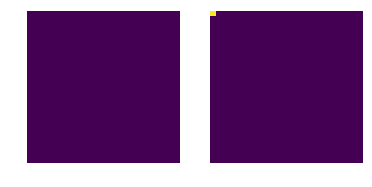

In [16]:
img1 = sitk.Image(24,24, sitk.sitkUInt8)
img1[0,0] = 0

img2 = sitk.Image(img1.GetSize(), sitk.sitkUInt8)
# img2.SetDirection([0,1,0.5,0.5])
# img2.SetDirection([1, 0, 0, 1])
# img2.SetSpacing([0.5, 0.8])
img2.SetSpacing([1.000001,1.000001])
img2.SetOrigin([0.000001,0.000001])
img2[0,0] = 255

plt.subplot(1,2,1)
plt.imshow(sitk.GetArrayViewFromImage(img1))
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sitk.GetArrayViewFromImage(img2))
plt.axis('off')

img3 = img1 + img2
print(img3[0,0])

## Reading and Writing

SimpleITK can read and write images stored in a single file, or a set of files (e.g. DICOM series).

Images stored in the DICOM format have a meta-data dictionary associated with them, which is populated with the DICOM tags. When a DICOM series is read as a single image, the meta-data information is not available since DICOM tags are specific to each file. If you need the meta-data, you have three options:

1. Using the object oriented interface's [ImageSeriesReader](https://itk.org/SimpleITKDoxygen/html/classitk_1_1simple_1_1ImageSeriesReader.html) class, configure it to load the tags using the `MetaDataDictionaryArrayUpdateOn` method and possibly the `LoadPrivateTagsOn` method if you need the private tags. Once the series is read you can access the meta-data from the series reader using the `GetMetaDataKeys`, `HasMetaDataKey`, and `GetMetaData`.

2. Using the object oriented interface's [ImageFileReader](https://itk.org/SimpleITKDoxygen/html/classitk_1_1simple_1_1ImageFileReader.html), set a specific slice's file name and only read it's meta-data using the `ReadImageInformation` method which only reads the meta-data but not the bulk pixel information. Once the meta-data is read you can access it from the file reader using the `GetMetaDataKeys`, `HasMetaDataKey`, and `GetMetaData`.

3. Using the object oriented interface's [ImageFileReader](https://itk.org/SimpleITKDoxygen/html/classitk_1_1simple_1_1ImageFileReader.html), set a specific slice's file name and read it. Or using the procedural interface's, [ReadImage](https://itk.org/SimpleITKDoxygen/html/namespaceitk_1_1simple.html#ae3b678b5b043c5a8c93aa616d5ee574c) function, read a specific file. You can then access the meta-data directly from the [Image](https://itk.org/SimpleITKDoxygen/html/classitk_1_1simple_1_1Image.html) using the `GetMetaDataKeys`, `HasMetaDataKey`, and `GetMetaData`.

In the following cell, we read an image in JPEG format, and write it as PNG and BMP. File formats are deduced from the file extension. Appropriate pixel type is also set - you can override this and force a pixel type of your choice.

In [ ]:
img = sitk.ReadImage('./Data/SimpleITK.jpg')
print(img.GetPixelIDTypeAsString())

# write as PNG and BMP
sitk.WriteImage(img, os.path.join(OUTPUT_DIR, 'SimpleITK.png'))
sitk.WriteImage(img, os.path.join(OUTPUT_DIR, 'SimpleITK.bmp'))

Read an image in JPEG format and cast the pixel type according to user selection.

In [ ]:
# Several pixel types, some make sense in this case (vector types) and some are just show
# that the user's choice will force the pixel type even when it doesn't make sense
# (e.g. sitkVectorUInt16 or sitkUInt8).
pixel_types = { 'sitkUInt8': sitk.sitkUInt8,
                'sitkUInt16' : sitk.sitkUInt16,
                'sitkFloat64' : sitk.sitkFloat64,
                'sitkVectorUInt8' : sitk.sitkVectorUInt8,
                'sitkVectorUInt16' : sitk.sitkVectorUInt16,
                'sitkVectorFloat64' : sitk.sitkVectorFloat64}

def pixel_type_dropdown_callback(pixel_type, pixel_types_dict):
    #specify the file location and the pixel type we want
    img = sitk.ReadImage(fdata('SimpleITK.jpg'), pixel_types_dict[pixel_type])
    
    print(img.GetPixelIDTypeAsString())
    print(img[0,0])
    plt.imshow(sitk.GetArrayViewFromImage(img))
    plt.axis('off')
 
interact(pixel_type_dropdown_callback, pixel_type=list(pixel_types.keys()), pixel_types_dict=fixed(pixel_types));     

Read a mha file.

In [3]:
data_path = './Data/training_001_ct.mha'

# Use the functional interface to read the image.
original_image = sitk.ReadImage(data_path)

Write it as another mha file.

In [2]:
# Write the image.
output_file_name_3D = os.path.join(OUTPUT_DIR, '3DImage.mha')
sitk.WriteImage(original_image, output_file_name_3D)

NameError: name 'original_image' is not defined

Write an image series as JPEG. The WriteImage function receives a volume and a list of images names and writes the volume according to the z axis. For a displayable result we need to rescale the image intensities (default is [0,255]) since the JPEG format requires a cast to the UInt8 pixel type.

In [ ]:
sitk.WriteImage(sitk.Cast(sitk.RescaleIntensity(original_image), sitk.sitkUInt8), 
                [os.path.join(OUTPUT_DIR, 'JPG', 'slice{0:03d}.jpg'.format(i)) for i in range(original_image.GetSize()[2])]) 

## Image Display 
First, import necessary packages.

In [4]:
from display import *

It's hard to display 3D medical image in this web page. However, we can achieve in anther way.

In [5]:
interact(display_single_image, 
         image_x=(0,original_image.GetSize()[0]-1),
         image_y=(0,original_image.GetSize()[1]-1),
         image_z=(0,original_image.GetSize()[2]-1), 
         image_npa = fixed(sitk.GetArrayViewFromImage(original_image)))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0yNTUsIGRlc2NyaXB0aW9uPXUnaW1hZ2VfeCcsIG1heD01MTEpLCBJbnRTbGlkZXIodmFsdWU9MjU1LCBkZXNjcmlwdGlvbj3igKY=


<function display.display_single_image>